In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [14]:
orig_df = pd.read_csv('emissions_ffmpeg.csv')
orig_df['timestamp']

0      2024-03-06T11:24:35
1      2024-03-06T11:24:42
2      2024-03-06T11:24:49
3      2024-03-06T11:24:56
4      2024-03-06T11:25:03
              ...         
125    2024-03-06T11:40:51
126    2024-03-06T11:40:59
127    2024-03-06T11:41:06
128    2024-03-06T11:41:14
129    2024-03-06T11:41:22
Name: timestamp, Length: 130, dtype: object

In [15]:
# df['project_name'][df['project_name'].apply(lambda x: not x.endswith('_gpu2'))] += '_gpu2'
# df.describe()
# df.to_csv('emissions.csv')

In [16]:

start = datetime.datetime.strptime(orig_df['timestamp'][0].split('T')[-1], '%H:%M:%S')
end = datetime.datetime.strptime(orig_df['timestamp'][len(orig_df) - 1].split('T')[-1], '%H:%M:%S')

duration = end - start
duration.seconds / 60

16.783333333333335

In [17]:
df = orig_df.copy()
df['project_name'] = df['project_name'].apply(lambda x: x.split('_')[2].removesuffix('s'))
df['project_name'] = df['project_name'].astype('float')
df[['project_name', 'energy_consumed']]

,project_name,energy_consumed
0,0.125,0.000978
1,0.125,0.000978
2,0.125,0.000978
3,0.125,0.000978
4,0.125,0.000978
...,...,...
125,3.000,0.001362
126,3.000,0.001362
127,3.000,0.001362
128,3.000,0.001362


In [18]:
agg = df.groupby(df['project_name']).aggregate({'energy_consumed': 'mean'})

In [19]:
agg_norm = agg / agg.max()

In [20]:
agg_norm

,energy_consumed
project_name,
0.125,0.652029
0.250,0.709997
0.500,0.686941
0.750,0.710955
1.000,0.732259
1.250,0.885909
1.500,0.916582
1.750,0.893293
2.000,0.867266


In [21]:
agg_norm = agg_norm[0.2:]

Text(0, 0.5, 'Energy Consumption (Normalized)')

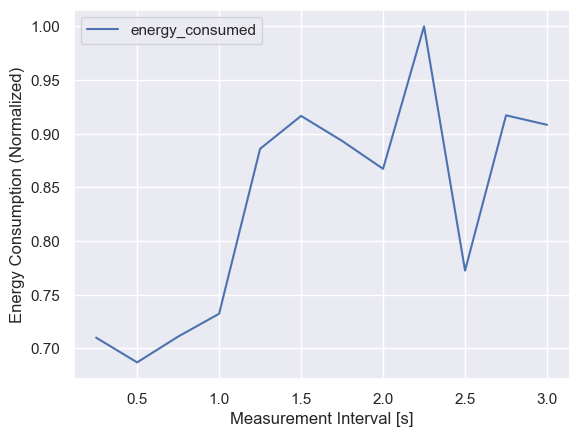

In [22]:
sns.set_theme()
# small_df = df[df['project_name'] < 3]
sns.lineplot(agg_norm)

plt.xlabel('Measurement Interval [s]')
plt.ylabel('Energy Consumption (Normalized)')
# sns.lineplot(x=small_df['project_name'], y=small_df['energy_consumed'])
# sns.lineplot(x=df['project_name'], y=df['cpu_energy'])